In [75]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import inspect
import ETL_config


### Extract Treasury Securities CSVs into DataFrames

In [102]:
# got from datasource https://www.federalreserve.gov/releases/h15/
frb_file = "Resources/FRB_H15.csv"
frb_df = pd.read_csv(frb_file)
frb_df.head(6)

,Series Description,"Market yield on U.S. Treasury securities at 1-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 6-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 2-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis"
0,Unit:,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year,Percent:_Per_Year
1,Multiplier:,1,1,1,1,1,1,1,1,1,1,1
2,Currency:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unique Identifier:,H15/H15/RIFLGFCM01_N.B,H15/H15/RIFLGFCM03_N.B,H15/H15/RIFLGFCM06_N.B,H15/H15/RIFLGFCY01_N.B,H15/H15/RIFLGFCY02_N.B,H15/H15/RIFLGFCY03_N.B,H15/H15/RIFLGFCY05_N.B,H15/H15/RIFLGFCY07_N.B,H15/H15/RIFLGFCY10_N.B,H15/H15/RIFLGFCY20_N.B,H15/H15/RIFLGFCY30_N.B
4,Time Period,RIFLGFCM01_N.B,RIFLGFCM03_N.B,RIFLGFCM06_N.B,RIFLGFCY01_N.B,RIFLGFCY02_N.B,RIFLGFCY03_N.B,RIFLGFCY05_N.B,RIFLGFCY07_N.B,RIFLGFCY10_N.B,RIFLGFCY20_N.B,RIFLGFCY30_N.B
5,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN


In [103]:
# Drop some row without data
frb_df.set_index('Series Description',inplace=True)
newfrb_df=frb_df.drop({'Time Period','Unit:','Multiplier:','Currency:','Unique Identifier: '},axis='rows')
newfrb_df.reset_index(inplace=True)
newfrb_df.head(5)

,Series Description,"Market yield on U.S. Treasury securities at 1-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 6-month constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 2-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 3-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 5-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 7-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 10-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 20-year constant maturity, quoted on investment basis","Market yield on U.S. Treasury securities at 30-year constant maturity, quoted on investment basis"
0,1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1,1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
2,1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
3,1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
4,1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


### Transform premise DataFrame

In [119]:
newfrb_df.columns

Index(['Series Description',
       'Market yield on U.S. Treasury securities at 1-month   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 3-month   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 6-month   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 1-year   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 2-year   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 7-year   constant maturity, quoted on investment basis',
       'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on inves

In [106]:
treasury_securities_df = newfrb_df[[
     'Series Description',
     'Market yield on U.S. Treasury securities at 1-year   constant maturity, quoted on investment basis',
     'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis', 
     'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis',
     'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on investment basis']].copy()
treasury_securities_df=treasury_securities_df.rename(columns={
     'Series Description':'data_date','Market yield on U.S. Treasury securities at 1-year   constant maturity, quoted on investment basis':'treasury_securities_1y',
     'Market yield on U.S. Treasury securities at 3-year   constant maturity, quoted on investment basis':'treasury_securities_3y',
     'Market yield on U.S. Treasury securities at 5-year   constant maturity, quoted on investment basis':'treasury_securities_5y',
     'Market yield on U.S. Treasury securities at 10-year   constant maturity, quoted on investment basis':'treasury_securities_10y'})
treasury_securities_df.tail(5)

,data_date,treasury_securities_1y,treasury_securities_3y,treasury_securities_5y,treasury_securities_10y
15859,2022-10-17,4.50,4.45,4.24,4.02
15860,2022-10-18,4.50,4.43,4.21,4.01
15861,2022-10-19,4.60,4.56,4.35,4.14
15862,2022-10-20,4.66,4.66,4.45,4.24
15863,2022-10-21,4.58,4.52,4.34,4.21


In [107]:
# Check the data type
treasury_securities_df.dtypes

data_date                  object
treasury_securities_1y     object
treasury_securities_3y     object
treasury_securities_5y     object
treasury_securities_10y    object
dtype: object

In [108]:
# Set the data type of columns
# Delete the row without data, value is 'ND'
treasury_securities_df=treasury_securities_df.drop(treasury_securities_df[treasury_securities_df['treasury_securities_1y']=='ND'].index)

# Correct data type
treasury_securities_df=treasury_securities_df.astype({'data_date':'datetime64[ns]',
        'treasury_securities_1y':'float',
        'treasury_securities_3y':'float',
        'treasury_securities_5y':'float',
        'treasury_securities_10y':'float',
        }.copy()
    ) 
treasury_securities_df.dtypes

data_date                  datetime64[ns]
treasury_securities_1y            float64
treasury_securities_3y            float64
treasury_securities_5y            float64
treasury_securities_10y           float64
dtype: object

In [109]:
treasury_securities_df=treasury_securities_df.sort_values('data_date',ascending=False)
treasury_securities_df

,data_date,treasury_securities_1y,treasury_securities_3y,treasury_securities_5y,treasury_securities_10y
15863,2022-10-21,4.58,4.52,4.34,4.21
15862,2022-10-20,4.66,4.66,4.45,4.24
15861,2022-10-19,4.60,4.56,4.35,4.14
15860,2022-10-18,4.50,4.43,4.21,4.01
15859,2022-10-17,4.50,4.45,4.24,4.02
...,...,...,...,...,...
4,1962-01-08,3.31,3.71,3.91,4.03
3,1962-01-05,3.26,3.71,3.89,4.02
2,1962-01-04,3.24,3.69,3.86,3.99
1,1962-01-03,3.24,3.70,3.87,4.03


### Extract Unemployment Rate CSVs into DataFrames

In [110]:
# got from https://catalog.data.gov/dataset/civilian-unemployment-rate-for-us-and-california
data_gov_file = "Resources/Civilian_Unemployment_Rate_for_US_and_California.csv"
data_gov_df = pd.read_csv(data_gov_file)
data_gov_df.head(5)

,Area Type,Area Name,Date,Year,Month,Seasonally Adjusted,Not Seasonally Adjusted
0,State,California,01/01/1976,1976,January,0.092,0.104
1,State,California,02/01/1976,1976,February,0.092,0.101
2,State,California,03/01/1976,1976,March,0.091,0.094
3,State,California,04/01/1976,1976,April,0.091,0.088
4,State,California,05/01/1976,1976,May,0.090,0.079


### Transform Unemployment DataFrame

In [111]:
# Delete the State unemployment data
new_data_gov_df=data_gov_df.drop(data_gov_df[data_gov_df['Area Type']=='State'].index)
new_data_gov_df.columns

Index(['Area Type', 'Area Name', 'Date', 'Year', 'Month',
       'Seasonally Adjusted ', 'Not Seasonally Adjusted'],
      dtype='object')

In [135]:
unemployment_df = new_data_gov_df[[
     'Date',
     'Seasonally Adjusted ',
     'Not Seasonally Adjusted'
     ]].copy()

unemployment_df.head()

,Date,Seasonally Adjusted,Not Seasonally Adjusted
561,01/01/1948,0.034,0.040
562,02/01/1948,0.038,0.047
563,03/01/1948,0.040,0.045
564,04/01/1948,0.039,0.040
565,05/01/1948,0.035,0.034


In [136]:
unemployment_df=unemployment_df.rename(columns={'Date':'data_date','Seasonally Adjusted ':'rate_seasonally_adjusted','Not Seasonally Adjusted':'rate_not_seasonally_adjusted'})
unemployment_df['rate_seasonally_adjusted']=unemployment_df['rate_seasonally_adjusted'].map(lambda x:x*100)
unemployment_df['rate_not_seasonally_adjusted']=unemployment_df['rate_not_seasonally_adjusted'].map(lambda x:x*100)
unemployment_df.head()

,data_date,rate_seasonally_adjusted,rate_not_seasonally_adjusted
561,01/01/1948,3.4,4.0
562,02/01/1948,3.8,4.7
563,03/01/1948,4.0,4.5
564,04/01/1948,3.9,4.0
565,05/01/1948,3.5,3.4


In [137]:
unemployment_df.dtypes

data_date                        object
rate_seasonally_adjusted        float64
rate_not_seasonally_adjusted    float64
dtype: object

In [138]:
unemployment_df=unemployment_df.astype({'data_date':'datetime64[ns]',
        'rate_seasonally_adjusted':'float',
        'rate_not_seasonally_adjusted':'float'
        }.copy()
    ) 
unemployment_df.dtypes

data_date                       datetime64[ns]
rate_seasonally_adjusted               float64
rate_not_seasonally_adjusted           float64
dtype: object

### Create database connection

In [123]:
protocol = 'postgresql'
password=ETL_config.password
username=ETL_config.username
host = 'localhost'
port = 5432
database_name = 'rate_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

In [139]:
# Confirm tables
insp = inspect(engine)
insp.get_table_names()

['treasury_securities', 'unemployee_rate', 'unemployment_rate']

### Load DataFrames into database

In [125]:
treasury_securities_df.to_sql(name='treasury_securities', con=engine, if_exists='append', index=False)

188

In [126]:
unemployment_df.to_sql(name='unemployment_rate', con=engine, if_exists='append', index=False)

897

In [ ]:
sql_join = r""" SELECT ts.data_date, ts.treasury_securities_1y, ts.treasury_securities_3y, ts.treasury_securities_5y, ts.treasury_securities_10y, ur.rate_seasonally_adjusted, ur.rate_not_seasonally_adjusted
FROM treasury_securities ts
INNER JOIN unemployment_rate ur
ON ts.data_date = ur.data_date """

full_df=pd.read_sql_query(sql_join, con=engine)
full_df.head()

,data_date,treasury_securities_1y,treasury_securities_3y,treasury_securities_5y,treasury_securities_10y,rate_seasonally_adjusted,rate_not_seasonally_adjusted
0,1962-02-01,3.30,3.81,4.00,4.09,0.055,0.065
1,1962-03-01,3.15,3.44,3.71,3.98,0.056,0.062
2,1962-05-01,3.06,3.45,3.63,3.85,0.055,0.051
3,1962-06-01,2.98,3.35,3.64,3.89,0.055,0.059
4,1962-08-01,3.30,3.59,3.80,4.03,0.057,0.053


In [127]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

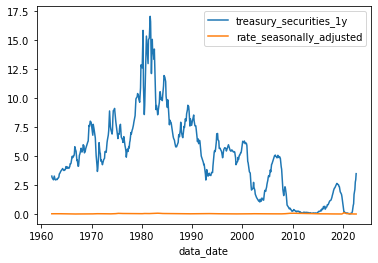

In [132]:
full_df.plot(x='data_date', y=['treasury_securities_1y', 'rate_seasonally_adjusted'])
plt.show()